In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_input = pd.read_csv("../DATA/latency-parsed/input-driver-latency.csv")
df_2Bidi = pd.read_csv("../DATA/latency-parsed/netflow2Bidi-latency.csv")
df_agg   = pd.read_csv("../DATA/latency-parsed/netflowAgg-latency.csv")
df_cds   = pd.read_csv("../DATA/latency-parsed/consumerCDS-latency.csv")


In [105]:
# Get only even rows from df_input in a way to make all dataframes have 1250 samples
df_input = df_input.iloc[::2].reset_index(drop=True)
print("df_input.shape:\t", df_input.shape)
# Drop Na values in df_2Bidi
df_2Bidi = df_2Bidi.dropna().reset_index(drop=True)
print("df_2Bidi.shape:\t", df_2Bidi.shape)

print("df_agg.shape:\t", df_agg.shape)
print("df_cds.shape:\t", df_cds.shape)

df_input.shape:	 (1250, 3)
df_2Bidi.shape:	 (1250, 3)
df_agg.shape:	 (1250, 3)
df_cds.shape:	 (1250, 3)


In [131]:
# create duration_ms columns
df_input["duration"] = df_input['nanoTimestamp-End'] - df_input['nanoTimestamp-Start']
df_2Bidi["duration"] = df_2Bidi['nanoTimestamp-End'] - df_2Bidi['nanoTimestamp-Start']
df_agg["duration"]   = df_agg['nanoTimestamp-End']   - df_agg['nanoTimestamp-Start']
df_cds["duration"]   = df_cds['nanoTimestamp-End']   - df_cds['nanoTimestamp-Start']

# calculate duration in milliseconds
df_input["duration_ms"] = df_input["duration"]/1000000
df_2Bidi["duration_ms"] = df_2Bidi["duration"]/1000000
df_agg["duration_ms"] = df_agg["duration"]/1000000
df_cds["duration_ms"] = df_cds["duration"]/1000000

##### Calculate throughput and other metrics

In [157]:
total_packets = 1250
df_input_th = total_packets/(df_input['nanoTimestamp-Start'].iloc[-1] - df_input['nanoTimestamp-Start'].iloc[0])*1000000000
df_2Bidi_th = total_packets/(df_2Bidi['nanoTimestamp-Start'].iloc[-1] - df_2Bidi['nanoTimestamp-Start'].iloc[0])*1000000000
df_agg_th   = total_packets/(df_agg['nanoTimestamp-Start'].iloc[-1]   - df_agg['nanoTimestamp-Start'].iloc[0])*1000000000
df_cds_th   = total_packets/(df_cds['nanoTimestamp-Start'].iloc[-1]   - df_cds['nanoTimestamp-Start'].iloc[0])*1000000000

print("MEAN EVENTS PER SECOND")
print("df_input_th:\t", df_input_th)
print("df_2Bidi_th:\t", df_2Bidi_th)
print("df_agg_th:\t", df_agg_th)
print("df_cds_th:\t", df_cds_th)

MEAN EVENTS PER ?
df_input_th:	 22.41757485748144
df_2Bidi_th:	 15.24461363464378
df_agg_th:	 49.010907002165034
df_cds_th:	 29.42180466481117


##### DURATION OF EACH PROCESSED EVENT

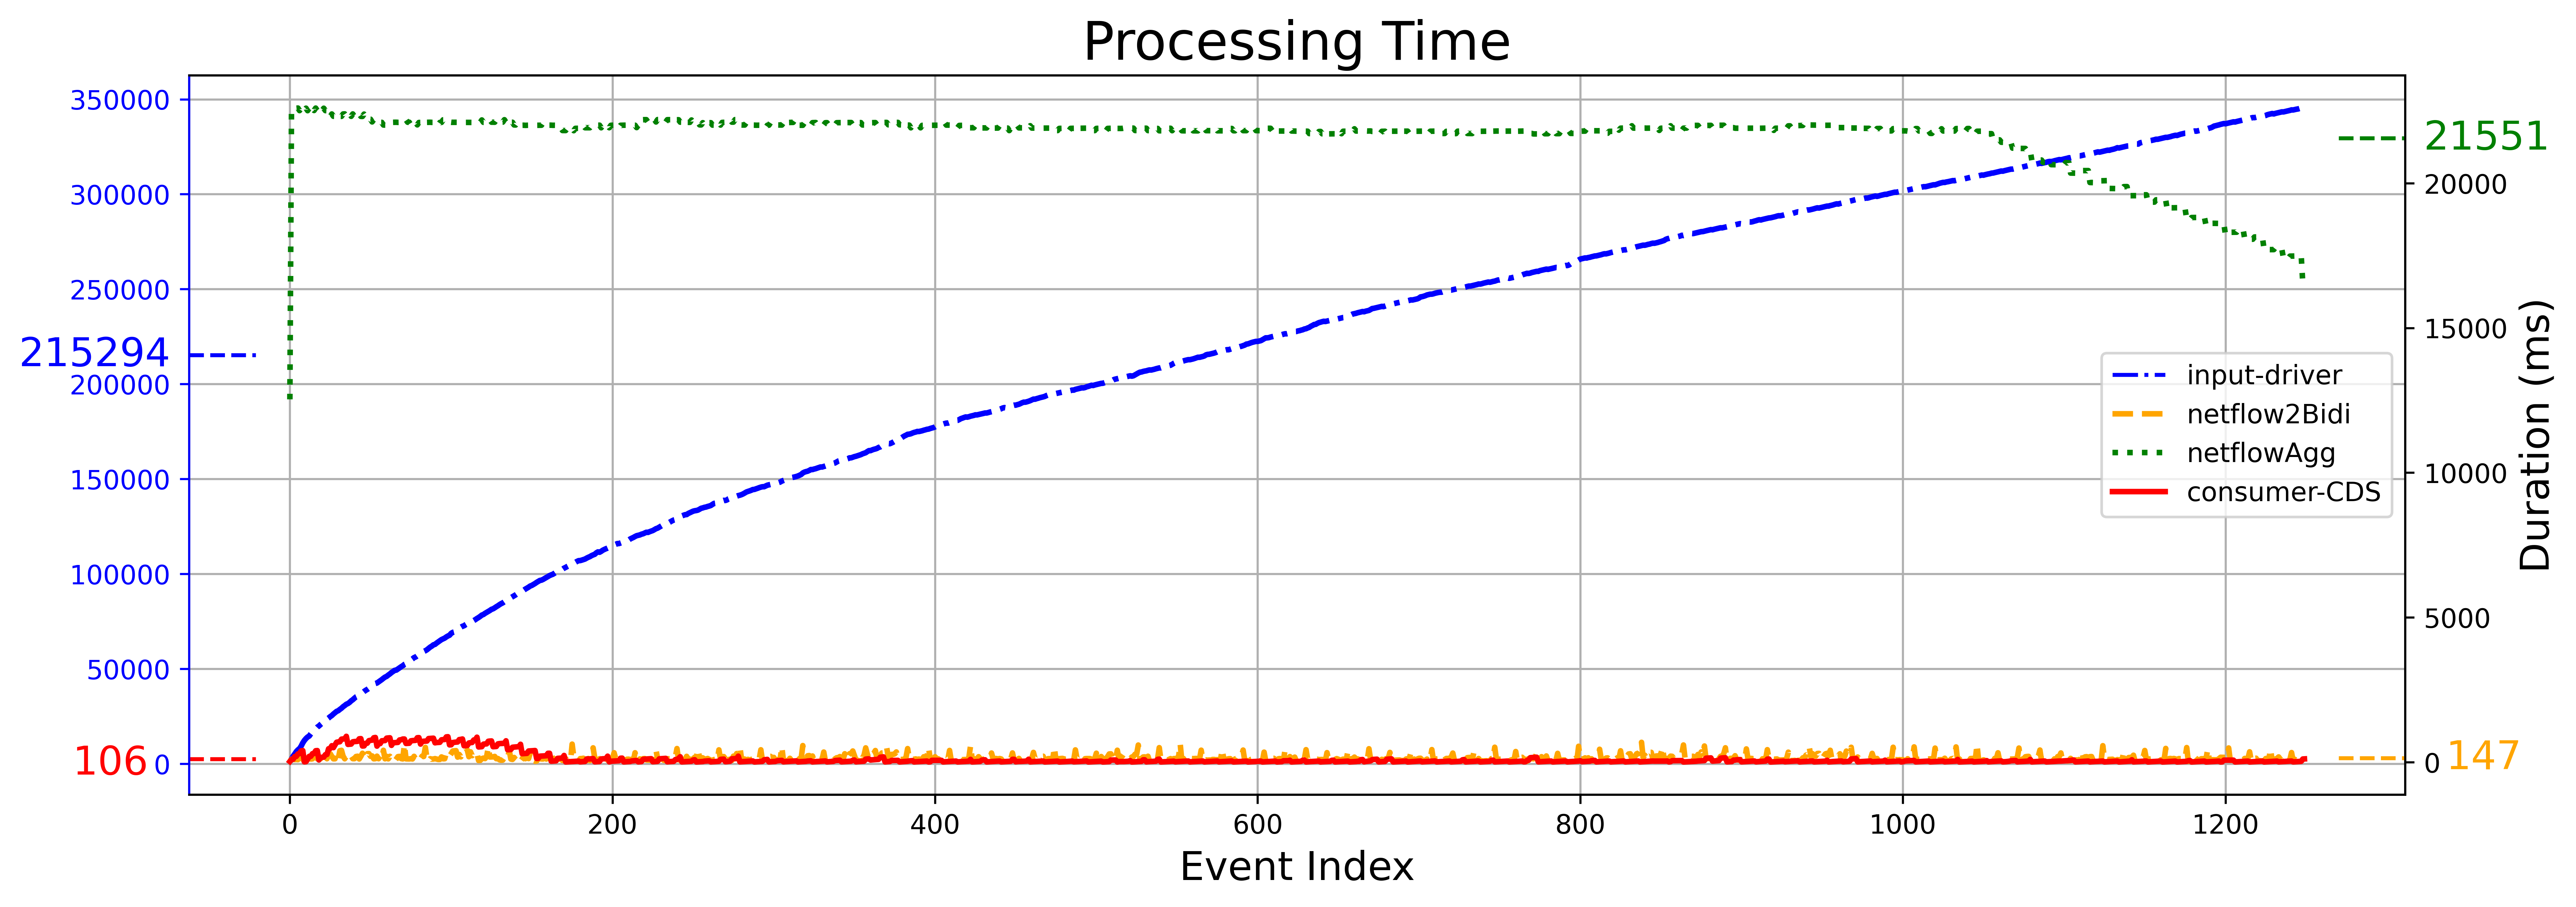

In [177]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots(figsize=(15, 5), dpi=600)

ax2=ax.twinx()
# to add input-driver to the legend
ax2.plot(np.nan, label = 'input-driver', color="blue", linestyle="dashdot")

# LINES
ax.plot(df_input.index.to_list(), df_input["duration_ms"].to_list(), color='blue', label="input-driver", linewidth=2.1, linestyle="dashdot")
ax2.plot(df_2Bidi.index.to_list(), df_2Bidi["duration_ms"].to_list(), color='orange', label="netflow2Bidi", linewidth=2.1, linestyle="dashed")
ax2.plot(df_agg.index.to_list(), df_agg["duration_ms"].to_list(), color='green', label="netflowAgg", linewidth=2.1, linestyle="dotted")
ax2.plot(df_cds.index.to_list(), df_cds["duration_ms"].to_list(), color='red', label="consumer-CDS", linewidth=2.1, linestyle="solid")

# MEANS
ax.axhline(df_input["duration_ms"].mean(), xmin=0, xmax=0.03, color='blue', linestyle='--')
ax2.axhline(df_2Bidi["duration_ms"].mean(), xmin=0.97, xmax=1, color='orange', linestyle='--')
ax2.axhline(df_agg["duration_ms"].mean(), xmin=0.97, xmax=1, color='green', linestyle='--')
ax2.axhline(df_cds["duration_ms"].mean(), xmin=0, xmax=0.03, color='red', linestyle='--')


# CONFIGURATION AX
ax.set_title("Processing Time", size=20)
ax.set_xlabel("Event Index", size=15)
ax.grid()
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,df_input["duration_ms"].mean(), "{:.0f}".format(df_input["duration_ms"].mean()), color="blue", transform=trans, 
        ha="right", va="center", size=15)
ax.text(-0.01,df_cds["duration_ms"].mean(), "{:.0f}".format(df_cds["duration_ms"].mean()), color="red", transform=trans, 
        ha="right", va="center", size=15)

#CONFIGURATION AX2
ax2.set_ylabel("Duration (ms)",fontsize=15)
ax2.spines['left'].set_color('blue')
ax.tick_params(axis="y", colors='blue', which='both')
# ax2.set_ylim(0, 0.5*1000000000)
ax2.legend(loc="best")
trans = transforms.blended_transform_factory(
    ax2.get_yticklabels()[0].get_transform(), ax2.transData)
ax2.text(1.01,df_2Bidi["duration_ms"].mean(), "{:.0f}".format(df_2Bidi["duration_ms"].mean()), color="orange", transform=trans, 
        ha="left", va="center", size=15)
ax2.text(1,df_agg["duration_ms"].mean(), "{:.0f}".format(df_agg["duration_ms"].mean()), color="green", transform=trans, 
        ha="left", va="center", size=15)

plt.show()